In [81]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import image
import os
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, scale
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial.distance import cosine as cosine
from sklearn.metrics import accuracy_score
import sys
from skimage import filters, feature
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [148]:
from common.img_data_functions import read_image, calc_crispness, get_custom_hist

In [4]:
image_array_rgb, image_array_grey, image_array_luv = read_image('../data/images/BUILDING/100477852@N05_22334842890.jpg')

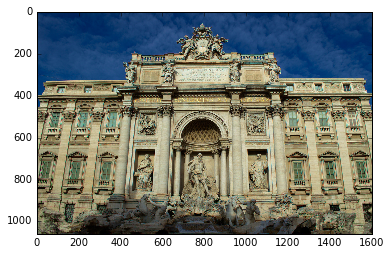

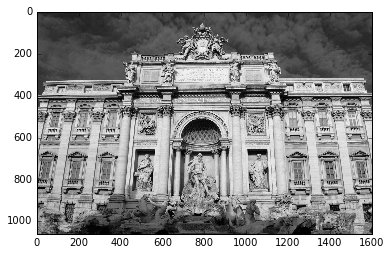

In [5]:
plt.imshow(image_array_rgb)
plt.show()
plt.imshow(image_array_grey, cmap='Greys_r')
plt.show()

In [31]:
image_array_grey_scaled = image_array_grey/255
image_array_rgb_scaled = image_array_rgb/255

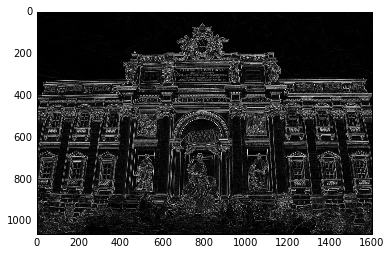

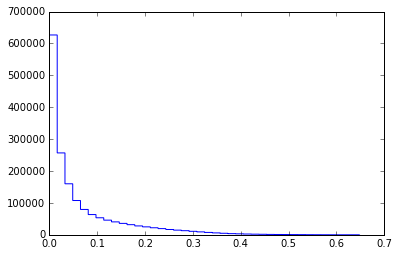

In [59]:
test = filters.sobel(image_array_grey_scaled)
plt.imshow(test, cmap="Greys_r")
plt.show()
test.var()
plt.hist(test.flatten(), bins=40, histtype='step')
plt.show()

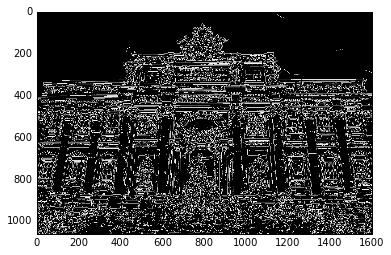

0.181191750044


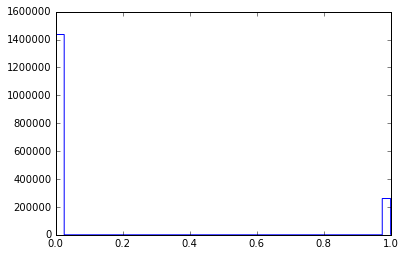

In [69]:
test2 = feature.canny(image_array_grey_scaled, sigma=1)
plt.imshow(test2, cmap="Greys_r")
plt.show()
print np.sum(test2 == True)/float(np.sum(test2 == False))
plt.hist(test2.flatten(), bins=40, histtype='step')
plt.show()

In [130]:
np.sum(test2 == True)/float(len(test2.flatten()))

0.15339740566037735

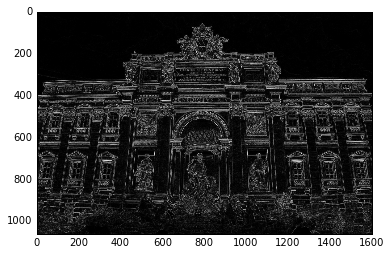

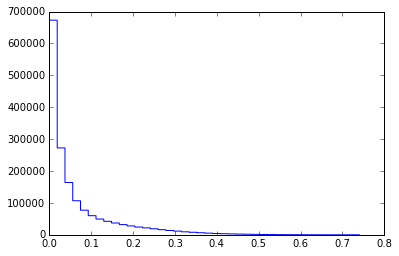

In [55]:
test3 = filters.roberts(image_array_grey_scaled)
plt.imshow(test3, cmap="Greys_r")
plt.show()
test3.var()
plt.hist(test3.flatten(), bins=40, histtype='step')
plt.show()

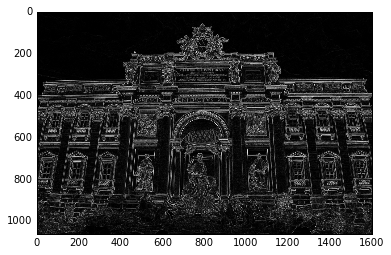

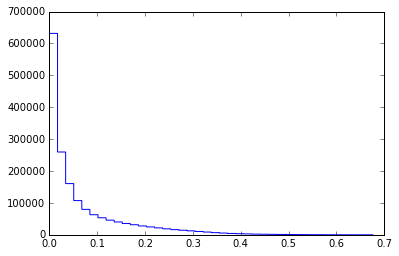

In [57]:
test4 = filters.scharr(image_array_grey_scaled)
plt.imshow(test4, cmap="Greys_r")
plt.show()
test4.var()
plt.hist(test4.flatten(), bins=40, histtype='step')
plt.show()

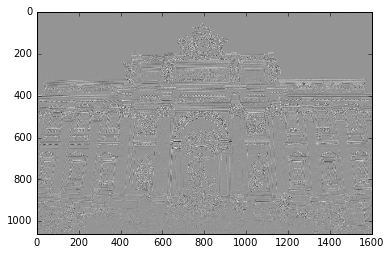

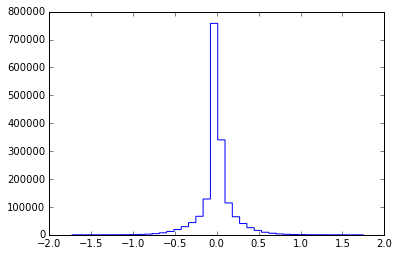

In [56]:
test5 = filters.laplace(image_array_grey_scaled, ksize=3)
plt.imshow(test5, cmap="Greys_r")
plt.show()
test5.var()
plt.hist(test5.flatten(), bins=40, histtype='step')
plt.show()

In [40]:
calc_crispness(image_array_grey)

(0.0074684298336299814, 0.129866641597043, 0.035371089428156983)

In [ ]:
test2.var()

In [92]:
def find_dominant_colors(color_array, num_colors):
    """
    Find the [num_colors] dominant colors in an RGB immage using KMeans cluter.

    INPUTS:
    color_array | A 3D Numpy Array of the RGB channels.
    num_colors | Number of color centers to return.

    OUTPUTS:
    dom_colors | A 2D Numpy Array of the dominant RGB colors with shape:
                 [num_colors, 3]
    """
    X = np.concatenate((color_array[:, :, 0].flatten().reshape((-1, 1)),
                        color_array[:, :, 1].flatten().reshape((-1, 1)),
                        color_array[:, :, 2].flatten().reshape((-1, 1))),
                       axis=1)
    model = KMeans(n_clusters=num_colors, n_jobs=1, n_init=4)
    model.fit(X)
    return model.cluster_centers_

In [93]:
find_dominant_colors(image_array_rgb, 3)

array([[ 125.07602653,  117.64888003,   88.38794396],
       [  30.85714572,   53.28519547,   77.32241289],
       [ 186.99391048,  181.33585438,  145.89508184]])

In [166]:
def find_brightness_centers(grey_array, num_centers):
    """
    Find the [num_centers] brightness centers in an immage using KMeans cluter.

    INPUTS:
    grey_array | A 2D Numpy Array of the grey channel.
    num_centers | Number of brightness centers to return.

    OUTPUTS:
    centers | A 1D Numpy Array of the dominant brightness center values.
    """
    X = grey_array.flatten().reshape((-1, 1))
    model = KMeans(n_clusters=num_centers, n_jobs=1, n_init=4, random_state=42)
    model.fit(X)
    centers = model.cluster_centers_.reshape((-1, ))
    counts = get_custom_hist(model.labels_, 0, num_centers-1, num_centers)
    return centers[np.argsort(counts)[::-1]]

In [167]:
centers = find_brightness_centers(image_array_grey, 8)

In [168]:
centers

array([  65.62162599,   45.13608771,  156.7132275 ,  180.49468137,
        129.34180319,   98.2236812 ,  203.3140163 ,   16.97857273])

In [172]:
a = 'myfirst_name'
a.insert(a.find('_', 'best'))

AttributeError: 'str' object has no attribute 'insert'

In [175]:
df = pd.read_csv('../data/modeling/BUILDING/model_data_BUILDING_5.csv', sep='|', index_col=0)

In [176]:
df.head()

,owner,id,red_bin1_nbins255,red_bin2_nbins255,red_bin3_nbins255,red_bin4_nbins255,red_bin5_nbins255,red_bin6_nbins255,red_bin7_nbins255,red_bin8_nbins255,...,bright_ctr2_numctrs3,bright_ctr3_numctrs3,bright_ctr1_numctrs8,bright_ctr2_numctrs8,bright_ctr3_numctrs8,bright_ctr4_numctrs8,bright_ctr5_numctrs8,bright_ctr6_numctrs8,bright_ctr7_numctrs8,bright_ctr8_numctrs8
0,100477852@N05,22334842890,0.049714,7.710495e-03,0.004919,0.004460,0.004275,0.004307,0.004183,0.004269,...,180.156076,121.404213,65.621626,45.136088,156.713228,180.494681,129.341803,98.223681,203.314016,16.978573
1,10075702@N00,27207215286,0.020037,1.017765e-02,0.009991,0.009921,0.009359,0.008085,0.006747,0.005709,...,119.609792,38.601534,184.079172,158.257146,106.486092,132.946391,214.015711,76.576349,13.408659,45.902885
2,101440531@N06,28229422525,0.000001,5.863039e-07,0.000006,0.000003,0.000002,0.000002,0.000003,0.000003,...,178.335380,124.698673,150.571874,162.457614,175.219916,138.828855,126.178692,189.010301,108.660230,68.143687
3,101501644@N04,19566423258,0.366638,4.191370e-02,0.028680,0.022051,0.018099,0.015619,0.014232,0.013221,...,97.132218,220.235921,1.386832,16.093706,37.727454,243.769871,68.118433,103.617132,145.721450,193.231638
4,10159247@N04,25341781554,0.004724,1.054761e-03,0.001174,0.001271,0.001270,0.001433,0.001448,0.001504,...,53.109002,206.839475,111.276953,133.544047,92.234746,61.363934,166.358806,28.483466,243.054558,201.951449


In [177]:
df.shape

(5, 2051)